In [145]:
from local_utils import load_m49, read_rvrs_datafile, read_resolver_definition, vector2series
import pandas as pd
import seaborn as sns
from typing import List

In [2]:
m49 = load_m49()
m49

,region_id,region_parent,region_code,region_name
0,001,000,XA,World
1,002,001,XB,Africa
2,014,002,XH,Eastern Africa
3,108,014,BI,Burundi
4,174,014,KM,Comoros
...,...,...,...,...
283,536,990,NT,Neutral Zone
284,915,990,CP,Clipperton Island
285,917,990,EA,Ceuta and Melilla
286,922,990,AP,Asia Pacific code


In [3]:
def yield_all_children(parent_id: str, level: int = 0):
    entries = regions[regions['region_parent'] == parent_id]

    if len(entries) > 0:
        for i, e in entries.iterrows():
            yield e['region_name']
            yield from yield_all_children(parent_id=e['region_id'], level=level + 1)

In [4]:
regions1 = m49[m49['region_parent'].isin(['001', '000'])]
regions = pd.concat([regions1, m49[m49['region_parent'].isin(regions1['region_id'])]]).drop_duplicates()
regions

,region_id,region_parent,region_code,region_name
0,001,000,XA,World
1,002,001,XB,Africa
65,019,001,XC,Americas
126,142,001,XD,Asia
183,150,001,XE,Europe
243,009,001,XF,Oceania
273,990,001,XG,Unclassified
2,014,002,XH,Eastern Africa
22,017,002,XI,Middle Africa
32,015,002,XJ,Northern Africa


In [5]:
region_order = list(yield_all_children(parent_id='000'))

In [6]:
regions.sort_values(by=['region_parent', 'region_id'])

,region_id,region_parent,region_code,region_name
0,001,000,XA,World
1,002,001,XB,Africa
243,009,001,XF,Oceania
65,019,001,XC,Americas
126,142,001,XD,Asia
183,150,001,XE,Europe
273,990,001,XG,Unclassified
47,011,002,XL,Western Africa
2,014,002,XH,Eastern Africa
32,015,002,XJ,Northern Africa


In [7]:
reg_map = regions[['region_code', 'region_name']].set_index('region_code')['region_name']
reg_map

region_code
XA                                       World
XB                                      Africa
XC                                    Americas
XD                                        Asia
XE                                      Europe
XF                                     Oceania
XG                                Unclassified
XH                              Eastern Africa
XI                               Middle Africa
XJ                             Northern Africa
XK                             Southern Africa
XL                              Western Africa
XN                                   Caribbean
XO                             Central America
XP                               South America
XQ                            Northern America
XR                                Central Asia
XS                                Eastern Asia
XT                               Southern Asia
XU                          South-Eastern Asia
XV                                Western Asia
X

In [8]:
parent_map = regions[['region_id', 'region_name']].set_index('region_id')['region_name'].to_dict()

In [9]:
type(reg_map)

pandas.core.series.Series

In [10]:
children_id = set(m49['region_id']) - set(m49['region_parent'])
cc = m49[(m49['region_id'].isin(children_id)) & (m49['region_parent'] != 990)].copy()
cc['parent_name'] = cc['region_parent'].map(parent_map)
cc

,region_id,region_parent,region_code,region_name,parent_name
3,108,014,BI,Burundi,Eastern Africa
4,174,014,KM,Comoros,Eastern Africa
5,262,014,DJ,Djibouti,Eastern Africa
6,232,014,ER,Eritrea,Eastern Africa
7,231,014,ET,Ethiopia,Eastern Africa
...,...,...,...,...,...
283,536,990,NT,Neutral Zone,Unclassified
284,915,990,CP,Clipperton Island,Unclassified
285,917,990,EA,Ceuta and Melilla,Unclassified
286,922,990,AP,Asia Pacific code,Unclassified


In [288]:
cc_parent_name_map = cc[['region_code', 'parent_name']].set_index('region_code')['parent_name'].to_dict()
cc_name_map = cc[['region_code', 'region_name']].set_index('region_code')['region_name'].to_dict()

In [12]:
r0 = read_resolver_definition()

In [13]:
r0

,rv_name,rv_label,rv_url
0,allopnrvrs,All Open Resolvers,NaN
1,sameas,Same AS,NaN
2,samecc,Same Country,NaN
3,diffcc,Different Country,NaN
4,cloudflare,Cloudflare 1.1.1.1,https://1.1.1.1/dns/
5,cnnic,CNNIC SDNS,http://www.sdns.cn
6,dnspai,DNS PAI,http://www.dnspai.com/public.html
7,dnspod,DNSPod,https://www.dnspod.cn/products/public.dns
8,dnswatch,DNS.Watch,https://dns.watch
9,dyn,Oracle Dyn,https://help.dyn.com/internet-guide-setup/


In [14]:
r0['rv_name'].unique()

array(['allopnrvrs', 'sameas', 'samecc', 'diffcc', 'cloudflare', 'cnnic',
       'dnspai', 'dnspod', 'dnswatch', 'dyn', 'freedns', 'googlepdns',
       'greenteamdns', 'he', 'level3', 'neustar', 'onedns', 'opendns',
       'opennic', 'quad9', 'uncensoreddns', 'vrsgn', 'yandex', 'comodo',
       'safedns', 'freenom', 'cleanbrowsing', 'alternatedns', 'puntcat',
       'alidns', 'baidu', '114dns', 'quad101', 'xopnrvrs', 'incc',
       'outcc', 'inccx', 'outccx', 'diffcceu', 'diffccneu'], dtype=object)

In [15]:
rv_labels = r0['rv_name'].tolist()
rv_level1 = r0[r0['rv_url'].isnull()]['rv_name'].tolist()
all_open_rs = r0[~r0['rv_url'].isnull()]['rv_name'].tolist()

In [16]:

d0 = pd.concat(
    read_rvrs_datafile(filename=f'apnic_data/apnic-rvrs.{r}.20240604T105352.json', rv_labels=rv_labels) for r in
    regions['region_code'])

In [17]:
len(d0)

25361

<Axes: >

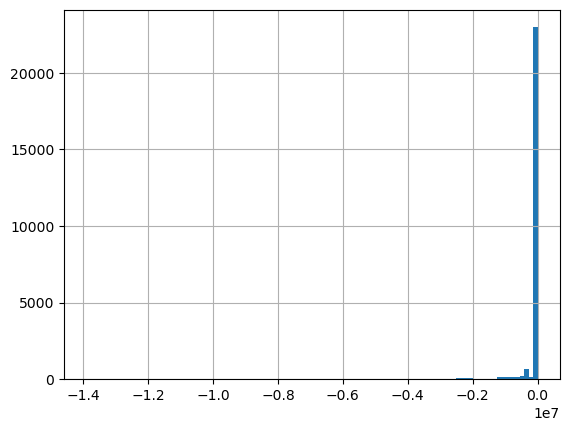

In [18]:
(d0['rv_seen'] - d0[['allopnrvrs', 'sameas', 'samecc', 'diffcc']].sum(axis=1)).hist(bins=100)

In [19]:
len(reg_map.index), len(set(reg_map.index))

(43, 43)

In [20]:
set(d0['rv_cc']) - set(reg_map.index)

set()

In [21]:
d0['region_name'] = pd.Categorical(d0['rv_cc'].map(reg_map), categories=region_order, ordered=True)
d0['str_date'] = pd.to_datetime(d0['rv_dt']).dt.strftime('%h_%Y')

In [22]:
d0[d0['rv_dt'].dt.day == 1]

,rv_dt,rv_cc,rv_type,rv_seen,rv_rtyp_seen,rv_seen_w,allopnrvrs,sameas,samecc,diffcc,...,diffcceu,diffccneu,out_cc_ratio,in_cc_ratio,same_as_ratio,google_pdns_ratio,all_open_res_ratio,non_open_res_ration,region_name,str_date
0,2022-01-01,XA,1q,13957647,"[2375355, 9397808, 2009790, 174693, 238781, 27...",13957600.00,2375355,9397808,2009790,174693,...,16759,157933,14.16,85.84,67.33,12.96,17.02,82.98,World,Jan_2022
31,2022-02-01,XA,1q,15128733,"[15128733, 9819773, 2191017, 208230, 315599, 3...",15128700.00,15128733,9819773,2191017,208230,...,20774,187456,15.63,84.37,64.91,14.38,100.00,80.77,World,Feb_2022
59,2022-03-01,XA,1q,14986688,"[14986688, 9420437, 2297149, 215104, 317668, 1...",14986700.00,14986688,9420437,2297149,215104,...,22280,192823,16.11,83.89,62.86,14.71,100.00,79.62,World,Mar_2022
90,2022-04-01,XA,1q,15704999,"[15704999, 9741568, 2376437, 223243, 381129, 5...",15705000.00,15704999,9741568,2376437,223243,...,11776,211467,16.87,83.13,62.03,15.72,100.00,78.58,World,Apr_2022
120,2022-05-01,XA,1q,15514554,"[15514554, 9876254, 2365701, 202188, 365844, 5...",15514600.00,15514554,9876254,2365701,202188,...,12453,189735,15.48,84.52,63.66,13.97,100.00,80.21,World,May_2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,2024-02-01,QS,1q,1474,"[271, 950, 104, 148, 17, 0, 0, 0, 0, 0, 0, 253...",1474.69,271,950,104,148,...,0,0,27.27,72.66,64.45,17.16,18.39,81.61,Polynesia,Feb_2024
776,2024-03-01,QS,1q,1521,"[451, 928, 27, 114, 1, 0, 0, 0, 0, 0, 0, 443, ...",1521.89,451,928,27,114,...,0,0,37.21,62.72,61.01,29.13,29.65,70.35,Polynesia,Mar_2024
807,2024-04-01,QS,1q,2394,"[374, 1611, 50, 358, 19, 0, 0, 0, 0, 0, 0, 340...",2394.15,374,1611,50,358,...,0,0,29.82,70.13,67.29,14.20,15.62,84.34,Polynesia,Apr_2024
837,2024-05-01,QS,1q,2176,"[344, 1474, 90, 267, 14, 0, 0, 0, 0, 0, 0, 328...",2176.87,344,1474,90,267,...,0,0,27.44,72.56,67.74,15.07,15.81,84.19,Polynesia,May_2024


In [23]:
d0.head(2)

,rv_dt,rv_cc,rv_type,rv_seen,rv_rtyp_seen,rv_seen_w,allopnrvrs,sameas,samecc,diffcc,...,diffcceu,diffccneu,out_cc_ratio,in_cc_ratio,same_as_ratio,google_pdns_ratio,all_open_res_ratio,non_open_res_ration,region_name,str_date
0,2022-01-01,XA,1q,13957647,"[2375355, 9397808, 2009790, 174693, 238781, 27...",13957600.0,2375355,9397808,2009790,174693,...,16759,157933,14.16,85.84,67.33,12.96,17.02,82.98,World,Jan_2022
1,2022-01-02,XA,1q,15524384,"[4924968, 10564868, 2222626, 187276, 265324, 3...",15524400.0,4924968,10564868,2222626,187276,...,18686,168589,13.89,86.11,68.05,12.54,31.72,83.58,World,Jan_2022


In [24]:
sel_days = ['2022-06-01', '2023-06-01', '2024-06-01']
d0[d0['rv_dt'].isin(sel_days)]

,rv_dt,rv_cc,rv_type,rv_seen,rv_rtyp_seen,rv_seen_w,allopnrvrs,sameas,samecc,diffcc,...,diffcceu,diffccneu,out_cc_ratio,in_cc_ratio,same_as_ratio,google_pdns_ratio,all_open_res_ratio,non_open_res_ration,region_name,str_date
150,2022-06-01,XA,1q,15216565,"[3163067, 9631708, 2258618, 163171, 369959, 65...",15216600.00,3163067,9631708,2258618,163171,...,16296,146874,14.18,85.82,63.30,14.74,20.79,79.21,World,Jun_2022
512,2023-06-01,XA,1q,21320308,"[2860593, 13912339, 4078855, 468519, 269256, 4...",21320300.00,2860593,13912339,4078855,468519,...,0,0,11.58,88.42,65.25,10.29,13.42,86.58,World,Jun_2023
873,2024-06-01,XA,1q,23173426,"[2311250, 15299001, 4414586, 1148587, 347980, ...",23173400.00,2311250,15299001,4414586,1148587,...,0,0,11.73,88.27,66.02,6.84,9.97,90.03,World,Jun_2024
150,2022-06-01,XB,1q,1528835,"[507659, 880606, 122861, 17707, 42002, 0, 0, 0...",1528840.00,507659,880606,122861,17707,...,2991,14716,33.95,66.05,57.60,26.66,33.21,66.79,Africa,Jun_2022
512,2023-06-01,XB,1q,2189477,"[550940, 1302447, 236985, 99103, 13321, 0, 0, ...",2189480.00,550940,1302447,236985,99103,...,0,0,29.71,70.29,59.49,21.73,25.16,74.84,Africa,Jun_2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,2023-06-01,QR,1q,1473,"[552, 563, 175, 182, 29, 0, 0, 0, 0, 0, 0, 504...",1473.80,552,563,175,182,...,0,0,56.75,43.25,38.22,34.22,37.47,62.53,Micronesia,Jun_2023
868,2024-06-01,QR,1q,1600,"[668, 642, 19, 270, 18, 0, 0, 0, 0, 0, 0, 610,...",1600.84,668,642,19,270,...,0,0,68.88,31.12,40.12,38.12,41.75,58.25,Micronesia,Jun_2024
150,2022-06-01,QS,1q,1523,"[351, 994, 48, 128, 68, 0, 0, 0, 0, 0, 0, 261,...",1523.64,351,994,48,128,...,0,128,37.49,62.51,65.27,17.14,23.05,76.95,Polynesia,Jun_2022
512,2023-06-01,QS,1q,2240,"[340, 1641, 91, 167, 2, 0, 0, 0, 0, 0, 0, 331,...",2240.34,340,1641,91,167,...,0,0,26.70,73.30,73.26,14.78,15.18,84.82,Polynesia,Jun_2023


In [25]:
c0 = d0[d0['rv_dt'].isin(sel_days)][['str_date', 'region_name', 'same_as_ratio']].pivot_table(index='region_name',
                                                                                              columns='str_date')
c0.columns = c0.columns.map('_'.join).str.strip()
c0['diff_2024_2022'] = c0['same_as_ratio_Jun_2024'] - c0['same_as_ratio_Jun_2022']
c0

,same_as_ratio_Jun_2022,same_as_ratio_Jun_2023,same_as_ratio_Jun_2024,diff_2024_2022
region_name,,,,
World,63.30,65.25,66.02,2.72
Africa,57.60,59.49,57.01,-0.59
Eastern Africa,54.79,52.46,46.49,-8.30
Middle Africa,49.83,59.86,59.83,10.00
Northern Africa,55.72,55.35,55.43,-0.29
Southern Africa,62.42,62.77,45.80,-16.62
Western Africa,62.12,68.08,70.05,7.93
Americas,63.14,65.40,64.36,1.22
Caribbean,70.50,70.12,69.41,-1.09


In [26]:
c0.to_parquet('same_as_ratio_comparison.parquet')

In [27]:
c0.columns

Index(['same_as_ratio_Jun_2022', 'same_as_ratio_Jun_2023',
       'same_as_ratio_Jun_2024', 'diff_2024_2022'],
      dtype='object')

In [28]:
c1 = d0[d0['rv_dt'].isin(sel_days)][['str_date', 'region_name', 'all_open_res_ratio']].pivot_table(index='region_name',
                                                                                                   columns='str_date')
c1.columns = c1.columns.map('_'.join).str.strip()
c1['diff_2024_2022'] = c1['all_open_res_ratio_Jun_2024'] - c1['all_open_res_ratio_Jun_2022']
c1

,all_open_res_ratio_Jun_2022,all_open_res_ratio_Jun_2023,all_open_res_ratio_Jun_2024,diff_2024_2022
region_name,,,,
World,20.79,13.42,9.97,-10.82
Africa,33.21,25.16,14.70,-18.51
Eastern Africa,39.89,37.09,11.26,-28.63
Middle Africa,47.10,33.46,17.57,-29.53
Northern Africa,26.04,18.84,14.29,-11.75
Southern Africa,25.65,23.21,12.35,-13.30
Western Africa,34.87,20.14,17.99,-16.88
Americas,24.86,14.46,11.98,-12.88
Caribbean,28.45,21.30,20.70,-7.75


In [29]:
c1.to_parquet('all_open_res_ratio_comparison.parquet')

In [30]:
d0[d0['rv_dt'].isin(sel_days)][['rv_dt', 'region_name', 'google_pdns_ratio']].pivot_table(index='region_name',
                                                                                          columns='rv_dt')

google_pdns_ratio                      
rv_dt                            2022-06-01 2023-06-01 2024-06-01
region_name                                                      
World                                 14.74      10.29       6.84
Africa                                26.66      21.73      11.29
Eastern Africa                        30.19      30.92       5.66
Middle Africa                         37.56      30.96      15.44
Northern Africa                       23.45      18.24      13.95
Southern Africa                       16.44      19.21       5.89
Western Africa                        28.18      16.17      13.85
Americas                              19.93      11.34       9.30
Caribbean                             24.63      18.75      18.23
Central America                       13.61      11.09       6.19
South America                         23.98      15.55      13.70
Northern America                      17.68       6.37       5.05
Asia                                  11.13       8.58       5.56
Central Asia                          23.72      16.78      19.26
Eastern Asia                           3.11       2.00       1.12
Southern Asia                         15.86      13.18       5.95
South-Eastern Asia                    19.31      14.94      14.14
Western Asia                          17.12      11.29       7.95
Europe                                14.26       7.56       5.59
Eastern Europe                        14.16       8.51       6.77
Northern Europe                        9.88       5.12       4.82
Southern Europe                       12.08       7.21       5.52
Western Europe                        18.44       8.61       5.34
Oceania                                7.30       5.49       3.21
Australia and New Zealand              5.66       4.02       2.13
Melanesia                             20.44      17.66       9.96
Micronesia                            30.26      34.22      38.12
Polynesia                             17.14      14.78      14.78
Unclassified                          73.91      16.88      10.86

#  Country level data

In [31]:
cc

,region_id,region_parent,region_code,region_name,parent_name
3,108,014,BI,Burundi,Eastern Africa
4,174,014,KM,Comoros,Eastern Africa
5,262,014,DJ,Djibouti,Eastern Africa
6,232,014,ER,Eritrea,Eastern Africa
7,231,014,ET,Ethiopia,Eastern Africa
...,...,...,...,...,...
283,536,990,NT,Neutral Zone,Unclassified
284,915,990,CP,Clipperton Island,Unclassified
285,917,990,EA,Ceuta and Melilla,Unclassified
286,922,990,AP,Asia Pacific code,Unclassified


In [32]:

d1 = pd.concat(
    read_rvrs_datafile(filename=f'apnic_data/apnic-rvrs.{r}.20240606T141121.json', rv_labels=rv_labels) for r in
    cc['region_code'])

In [33]:
len(d1)

206392

In [34]:
d1['str_date'] = pd.to_datetime(d1['rv_dt']).dt.strftime('%h_%Y')

In [35]:
d1.head(10)

,rv_dt,rv_cc,rv_type,rv_seen,rv_rtyp_seen,rv_seen_w,allopnrvrs,sameas,samecc,diffcc,...,outccx,diffcceu,diffccneu,out_cc_ratio,in_cc_ratio,same_as_ratio,google_pdns_ratio,all_open_res_ratio,non_open_res_ration,str_date
0,2022-01-01,BI,1q,955,"[302, 653, 0, 0, 0, 0, 0, 0, 0, 0, 0, 260, 0, ...",2498.22,302,653,0,0,...,3,0,0,31.94,68.06,68.38,27.23,31.62,68.38,Jan_2022
1,2022-01-02,BI,1q,983,"[313, 670, 0, 0, 2, 0, 0, 0, 0, 0, 0, 291, 0, ...",2778.69,313,670,0,0,...,1,0,0,31.94,68.06,68.16,29.60,31.84,68.16,Jan_2022
2,2022-01-03,BI,1q,1194,"[358, 836, 0, 0, 0, 0, 0, 0, 0, 0, 0, 328, 0, ...",2957.76,358,836,0,0,...,1,0,0,30.07,69.93,70.02,27.47,29.98,70.02,Jan_2022
3,2022-01-04,BI,1q,1194,"[370, 819, 0, 5, 0, 0, 0, 0, 0, 0, 0, 329, 0, ...",2914.49,370,819,0,5,...,7,5,0,31.57,68.43,68.59,27.55,30.99,69.01,Jan_2022
4,2022-01-05,BI,1q,1470,"[492, 978, 0, 0, 0, 0, 0, 0, 0, 0, 0, 424, 0, ...",2943.18,492,978,0,0,...,3,0,0,33.67,66.33,66.53,28.84,33.47,66.53,Jan_2022
5,2022-01-06,BI,1q,1468,"[489, 979, 0, 0, 1, 0, 0, 0, 0, 0, 0, 405, 0, ...",2889.06,489,979,0,0,...,0,0,0,33.31,66.69,66.69,27.59,33.31,66.69,Jan_2022
6,2022-01-07,BI,1q,1184,"[405, 779, 0, 0, 2, 0, 0, 0, 0, 0, 0, 367, 0, ...",2767.97,405,779,0,0,...,0,0,0,34.21,65.79,65.79,31.00,34.21,65.79,Jan_2022
7,2022-01-08,BI,1q,1181,"[342, 839, 0, 0, 0, 0, 0, 0, 0, 0, 0, 316, 0, ...",2688.14,342,839,0,0,...,0,0,0,28.96,71.04,71.04,26.76,28.96,71.04,Jan_2022
8,2022-01-09,BI,1q,1192,"[347, 845, 0, 0, 0, 0, 0, 0, 0, 0, 0, 324, 0, ...",2674.17,347,845,0,0,...,0,0,0,29.11,70.89,70.89,27.18,29.11,70.89,Jan_2022
9,2022-01-10,BI,1q,1305,"[421, 884, 0, 0, 0, 0, 0, 0, 0, 0, 0, 381, 0, ...",2756.20,421,884,0,0,...,1,0,0,32.34,67.66,67.74,29.20,32.26,67.74,Jan_2022


<Axes: >

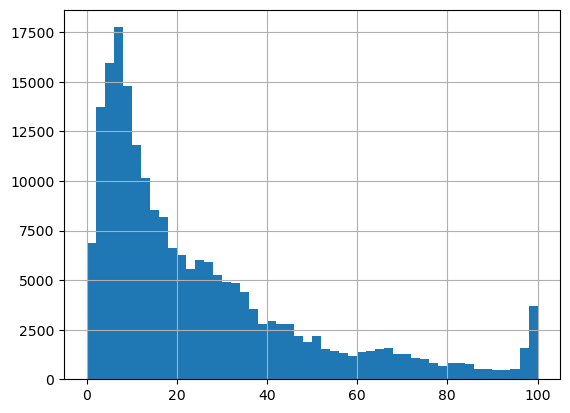

In [36]:
d1['all_open_res_ratio'].hist(bins=50)

In [37]:
# Save all data for Indonesia for a closer look
d1[d1['rv_cc'] == 'ID'].to_parquet('indonesia.parquet')

In [38]:
cc_parent_name_map

{'BI': 'Eastern Africa',
 'KM': 'Eastern Africa',
 'DJ': 'Eastern Africa',
 'ER': 'Eastern Africa',
 'ET': 'Eastern Africa',
 'KE': 'Eastern Africa',
 'MG': 'Eastern Africa',
 'MW': 'Eastern Africa',
 'MU': 'Eastern Africa',
 'YT': 'Eastern Africa',
 'MZ': 'Eastern Africa',
 'RE': 'Eastern Africa',
 'RW': 'Eastern Africa',
 'SC': 'Eastern Africa',
 'SO': 'Eastern Africa',
 'UG': 'Eastern Africa',
 'TZ': 'Eastern Africa',
 'ZM': 'Eastern Africa',
 'ZW': 'Eastern Africa',
 'AO': 'Middle Africa',
 'CM': 'Middle Africa',
 'CF': 'Middle Africa',
 'TD': 'Middle Africa',
 'CG': 'Middle Africa',
 'CD': 'Middle Africa',
 'GQ': 'Middle Africa',
 'GA': 'Middle Africa',
 'ST': 'Middle Africa',
 'DZ': 'Northern Africa',
 'EG': 'Northern Africa',
 'LY': 'Northern Africa',
 'MA': 'Northern Africa',
 'SD': 'Northern Africa',
 'SS': 'Northern Africa',
 'TN': 'Northern Africa',
 'EH': 'Northern Africa',
 'BW': 'Southern Africa',
 'LS': 'Southern Africa',
 'NA': 'Southern Africa',
 'ZA': 'Southern Africa

In [39]:
cc1 = d1[d1['rv_dt'].isin(sel_days)][['str_date', 'rv_cc', 'all_open_res_ratio']].pivot_table(index='rv_cc',
                                                                                              columns='str_date')
cc1.columns = cc1.columns.map('_'.join).str.strip()
cc1['diff_2024_2022'] = cc1['all_open_res_ratio_Jun_2024'] - cc1['all_open_res_ratio_Jun_2022']
cc1['rv_parent'] = cc1.index.map(cc_parent_name_map)
cc1

,all_open_res_ratio_Jun_2022,all_open_res_ratio_Jun_2023,all_open_res_ratio_Jun_2024,diff_2024_2022,rv_parent
rv_cc,,,,,
AD,67.48,65.45,60.90,-6.58,Southern Europe
AE,16.67,14.03,2.74,-13.93,Western Asia
AF,72.50,22.01,16.23,-56.27,Southern Asia
AG,10.97,27.54,15.53,4.56,Caribbean
AI,60.42,9.73,34.62,-25.80,Caribbean
...,...,...,...,...,...
YT,0.00,7.79,2.53,2.53,Eastern Africa
ZA,25.56,23.12,12.31,-13.25,Southern Africa
ZM,96.55,92.41,37.83,-58.72,Eastern Africa


In [40]:
cc1['diff_2024_2022'].describe()

count    235.000000
mean     -11.195787
std       21.414062
min     -100.000000
25%      -16.075000
50%       -7.300000
75%       -2.295000
max      100.000000
Name: diff_2024_2022, dtype: float64

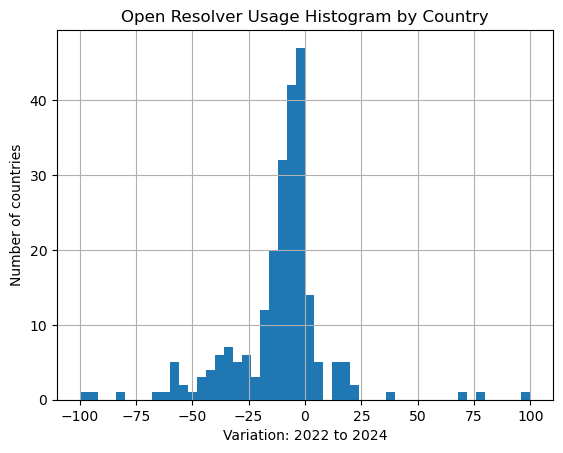

In [41]:
cc1.groupby('rv_parent')['diff_2024_2022'].describe()

,count,mean,std,min,25%,50%,75%,max
rv_parent,,,,,,,,
Australia and New Zealand,3.0,-16.640000,19.269299,-38.89,-22.2500,-5.610,-5.5150,-5.42
Caribbean,28.0,-3.829643,12.768771,-41.79,-9.2775,-2.895,-0.3450,20.18
Central America,8.0,-6.498750,4.283155,-12.93,-9.7600,-5.405,-3.3750,-1.35
Central Asia,5.0,-1.966000,13.600863,-17.62,-8.4500,-3.740,0.9400,19.04
Eastern Africa,18.0,-27.400556,22.819588,-66.81,-38.8500,-30.545,-7.0575,4.43
Eastern Asia,8.0,-17.256250,33.556614,-100.00,-8.8400,-5.955,-3.7400,-0.74
Eastern Europe,10.0,-8.653000,11.756865,-40.29,-8.4100,-5.725,-3.1725,1.82
Melanesia,5.0,-9.082000,10.463217,-19.25,-18.9300,-9.550,-2.5500,4.87
Micronesia,7.0,-1.005714,42.029001,-59.31,-18.0100,-9.970,10.9500,76.36


In [42]:
cc1.reset_index().to_parquet('all_open_res_ratio_country_comparison.parquet')

In [43]:
with pd.ExcelWriter('apnic-monthly-data.xlsx') as writer:
    d0[d0['rv_dt'].dt.day == 1].to_excel(writer, index=False, sheet_name='Region Level')
    d1[d1['rv_dt'].dt.day == 1].to_excel(writer, index=False, sheet_name='Country Level')

## Questions from ticket DA-587

### In France, At what point in the time series was there a spike in the use of global DNS resolvers? (I mean which year) - it looks like there is a noticeable spike in April 2022 but I wanted to check with you. and how can we visualize that? 

In [97]:
from scipy.interpolate import interp1d, make_interp_spline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [192]:
d1.columns

Index(['rv_dt', 'rv_cc', 'rv_type', 'rv_seen', 'rv_rtyp_seen', 'rv_seen_w',
       'allopnrvrs', 'sameas', 'samecc', 'diffcc', 'cloudflare', 'cnnic',
       'dnspai', 'dnspod', 'dnswatch', 'dyn', 'freedns', 'googlepdns',
       'greenteamdns', 'he', 'level3', 'neustar', 'onedns', 'opendns',
       'opennic', 'quad9', 'uncensoreddns', 'vrsgn', 'yandex', 'comodo',
       'safedns', 'freenom', 'cleanbrowsing', 'alternatedns', 'puntcat',
       'alidns', 'baidu', '114dns', 'quad101', 'xopnrvrs', 'incc', 'outcc',
       'inccx', 'outccx', 'diffcceu', 'diffccneu', 'out_cc_ratio',
       'in_cc_ratio', 'same_as_ratio', 'google_pdns_ratio',
       'all_open_res_ratio', 'non_open_res_ration', 'str_date'],
      dtype='object')

In [112]:
fr_google_pdns = (d1[(d1['rv_cc'] == 'FR') & (d1['rv_seen'] >= 20000)][
                      ['rv_dt', 'google_pdns_ratio', 'all_open_res_ratio', 'rv_seen']]
                  .copy()
                  .melt(id_vars='rv_dt', var_name='ratio', value_vars=['google_pdns_ratio', 'all_open_res_ratio'])
                  .assign(category=lambda df: df['ratio'].map(
    {'google_pdns_ratio': 'Google Public DNS', 'all_open_res_ratio': 'All Open Resolvers'})))

In [115]:
fr_google_pdns.sort_values(by='value', ascending=False).head(10)

,rv_dt,ratio,value,category
999,2022-05-13,all_open_res_ratio,44.46,All Open Resolvers
985,2022-04-28,all_open_res_ratio,41.59,All Open Resolvers
1005,2022-05-19,all_open_res_ratio,41.55,All Open Resolvers
1003,2022-05-17,all_open_res_ratio,41.24,All Open Resolvers
990,2022-05-03,all_open_res_ratio,40.72,All Open Resolvers
998,2022-05-12,all_open_res_ratio,40.59,All Open Resolvers
992,2022-05-05,all_open_res_ratio,40.15,All Open Resolvers
986,2022-04-29,all_open_res_ratio,40.12,All Open Resolvers
991,2022-05-04,all_open_res_ratio,40.08,All Open Resolvers
989,2022-05-02,all_open_res_ratio,39.64,All Open Resolvers


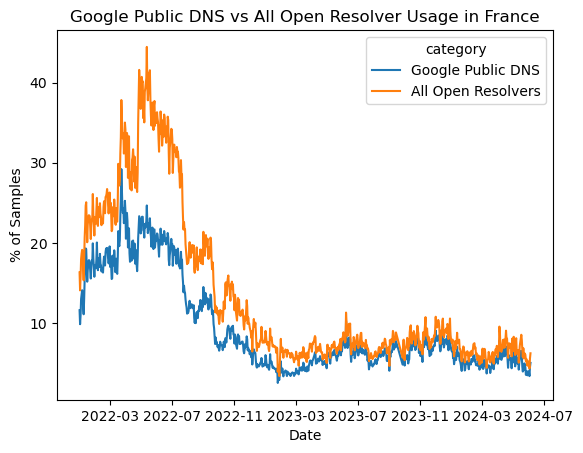

In [191]:
g0 = sns.lineplot(data=fr_google_pdns, x='rv_dt', y='value', hue='category')
g0.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
g0.set(title='Google Public DNS vs All Open Resolver Usage in France', xlabel='Date', ylabel='% of Samples')
g0.get_figure().savefig('france-google-public-dns.png')

<Axes: >

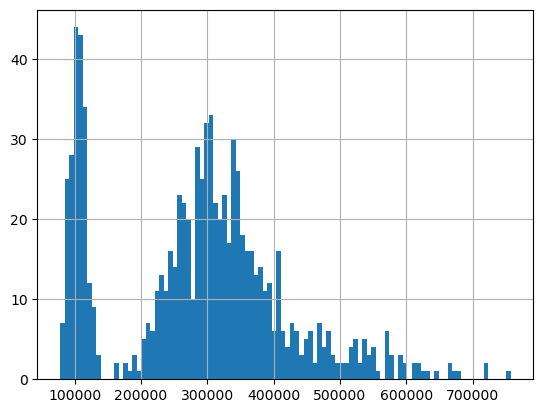

In [59]:
fr_google_pdns['rv_seen'].hist(bins=100)

In [56]:
fr_google_pdns.sort_values(by='rv_seen', ascending=True).head(10)

,rv_dt,google_pdns_ratio,rv_seen
617,2023-09-15,12.66,19306
82,2022-03-24,29.21,77943
81,2022-03-23,25.30,78508
603,2023-09-01,4.04,78771
80,2022-03-22,23.20,78913
76,2022-03-18,21.47,81732
146,2022-05-28,21.68,82650
83,2022-03-25,26.59,84255
85,2022-03-27,23.74,85749
147,2022-05-29,19.41,85957


## France in-country resolvers

In [197]:
fr_cc_res = (d1[(d1['rv_cc'] == 'FR') & (d1['rv_seen'] >= 20000)][['rv_dt', 'in_cc_ratio', 'out_cc_ratio', 'rv_seen']]
             .copy()
             # .assign(same_cc_ratio=lambda df: df['samecc']/df['rv_seen'], diff_cc_ratio=lambda df: df['diffcc']/df['rv_seen'])
             .melt(id_vars='rv_dt', var_name='ratio', value_vars=['in_cc_ratio', 'out_cc_ratio'])
             .assign(
    category=lambda df: df['ratio'].map({'in_cc_ratio': 'Same Country', 'out_cc_ratio': 'Different Country'})))

In [198]:
fr_cc_res

,rv_dt,ratio,value,category
0,2022-01-01,in_cc_ratio,85.84,Same Country
1,2022-01-02,in_cc_ratio,87.80,Same Country
2,2022-01-03,in_cc_ratio,86.30,Same Country
3,2022-01-04,in_cc_ratio,83.54,Same Country
4,2022-01-05,in_cc_ratio,82.54,Same Country
...,...,...,...,...
1731,2024-05-31,out_cc_ratio,8.63,Different Country
1732,2024-06-01,out_cc_ratio,8.65,Different Country
1733,2024-06-02,out_cc_ratio,7.44,Different Country
1734,2024-06-03,out_cc_ratio,9.73,Different Country


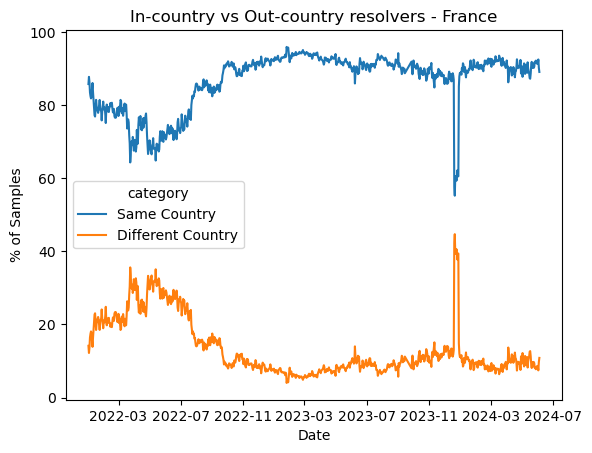

In [200]:
g0b = sns.lineplot(data=fr_cc_res, x='rv_dt', y='value', hue='category')
g0b.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
g0b.set(title='In-country vs Out-country resolvers - France', xlabel='Date', ylabel='% of Samples')
g0b.get_figure().savefig('france-in-out-country-resolver.png')

In [86]:
spline_df = pd.DataFrame(
    data={'rv_dt': pd.date_range(start=fr_google_pdns['rv_dt'].min(), end=fr_google_pdns['rv_dt'].max())}).merge(
    fr_google_pdns, on='rv_dt', how='left').fillna(0.0).assign(rv_seq=lambda df: range(1, len(df) + 1))
spline = make_interp_spline(spline_df['rv_seq'], spline_df['google_pdns_ratio'])

In [87]:
spline_df

,rv_dt,google_pdns_ratio,rv_seen,rv_seq
0,2022-01-01,11.59,112370.0,1
1,2022-01-02,9.85,136000.0,2
2,2022-01-03,11.00,121258.0,3
3,2022-01-04,13.00,117947.0,4
4,2022-01-05,13.56,117352.0,5
...,...,...,...,...
881,2024-05-31,3.96,302082.0,882
882,2024-06-01,3.87,337684.0,883
883,2024-06-02,3.37,407602.0,884
884,2024-06-03,4.50,365269.0,885


In [94]:
X = spline_df.query("google_pdns_ratio > 0")['rv_seq']
Y = spline(X)

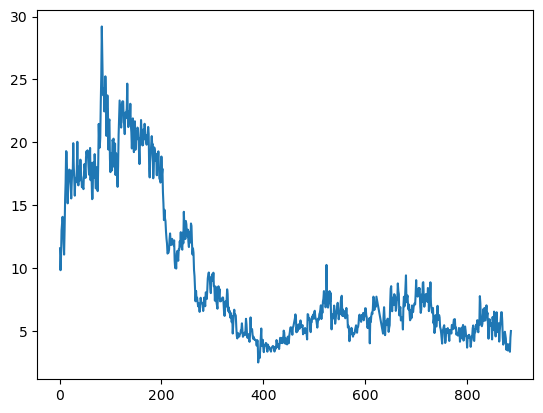

In [96]:
plt.plot(X, Y)

### I think Djibouti and India are interesting countries to look at. can you please send me a graph that shows the usage of global dns resolvers v local dns resolvers in India and Djibouti between 2022 to 2024?

In [116]:
d1.columns

Index(['rv_dt', 'rv_cc', 'rv_type', 'rv_seen', 'rv_rtyp_seen', 'rv_seen_w',
       'allopnrvrs', 'sameas', 'samecc', 'diffcc', 'cloudflare', 'cnnic',
       'dnspai', 'dnspod', 'dnswatch', 'dyn', 'freedns', 'googlepdns',
       'greenteamdns', 'he', 'level3', 'neustar', 'onedns', 'opendns',
       'opennic', 'quad9', 'uncensoreddns', 'vrsgn', 'yandex', 'comodo',
       'safedns', 'freenom', 'cleanbrowsing', 'alternatedns', 'puntcat',
       'alidns', 'baidu', '114dns', 'quad101', 'xopnrvrs', 'incc', 'outcc',
       'inccx', 'outccx', 'diffcceu', 'diffccneu', 'out_cc_ratio',
       'in_cc_ratio', 'same_as_ratio', 'google_pdns_ratio',
       'all_open_res_ratio', 'non_open_res_ration', 'str_date'],
      dtype='object')

In [154]:
def select_country(df: pd.DataFrame, cc: str, qrange: List[float] = [0.01, 0.99]) -> pd.DataFrame:
    tmp = (df
           .query("rv_cc==@cc")
           .loc[:, ['rv_dt', 'rv_seen', 'non_open_res_ration', 'all_open_res_ratio']]
           )

    # Calculate the rv_seen quantile to exclude anomalies
    qvalues = tmp['rv_seen'].quantile(qrange).values

    # Prepare final dataframe
    return (tmp[tmp['rv_seen']
            .between(*qvalues)]
            .copy()
            .melt(id_vars='rv_dt', var_name='ratio', value_vars=['non_open_res_ration', 'all_open_res_ratio'])
            .assign(category=lambda df: df['ratio'].map(
        {'non_open_res_ration': 'Non Open Resolvers', 'all_open_res_ratio': 'All Open Resolvers'}))
            .drop(columns=['ratio'])
            .merge(tmp[['rv_dt', 'rv_seen']], on='rv_dt', how='left')
            )

In [164]:
in_cc = select_country(d1, cc='IN', qrange=[0.02, 0.99])

<Axes: >

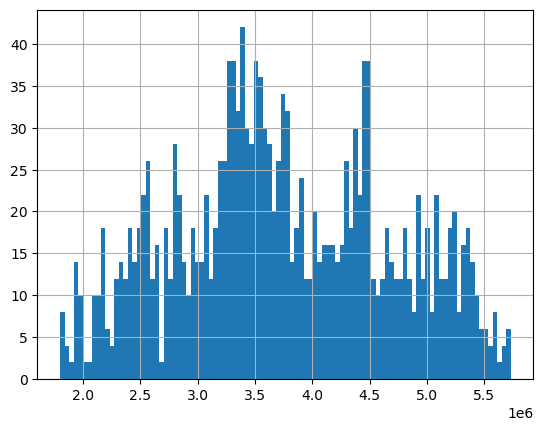

In [165]:
in_cc['rv_seen'].hist(bins=100)

In [166]:
dj_cc = select_country(d1, cc='DJ', qrange=[0.01, 0.99])

<Axes: >

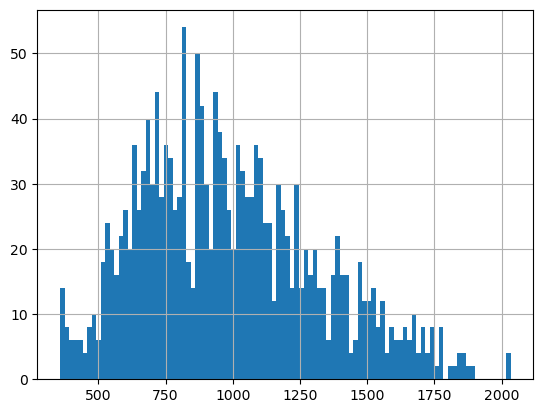

In [167]:
dj_cc['rv_seen'].hist(bins=100)

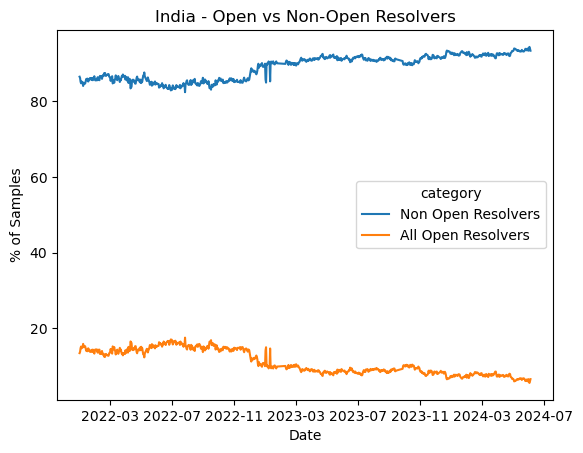

In [190]:
g1 = sns.lineplot(data=in_cc, x='rv_dt', y='value', hue='category')
g1.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
g1.set(title='India - Open vs Non-Open Resolvers', xlabel='Date', ylabel='% of Samples')
g1.get_figure().savefig('india-open-resolver-usage.png')

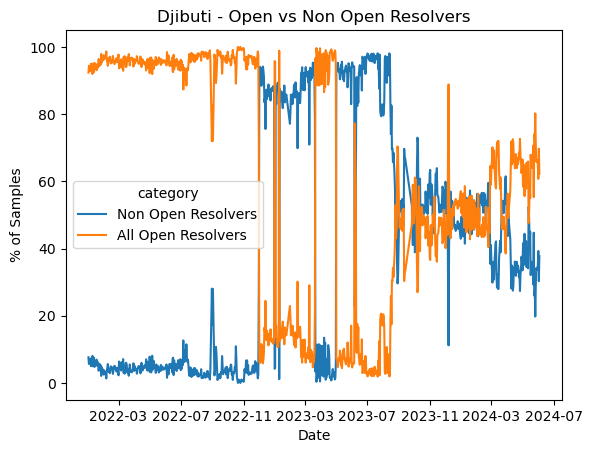

In [188]:
g2 = sns.lineplot(data=dj_cc, x='rv_dt', y='value', hue='category')
g2.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
g2.set(title='Djibuti - Open vs Non Open Resolvers', xlabel='Date', ylabel='% of Samples')
g2.get_figure().savefig('djibuti-open-resolvers-usage.png')

In [173]:
au_cc = select_country(d1, cc='AU', qrange=[0.01, 0.99])

<Axes: >

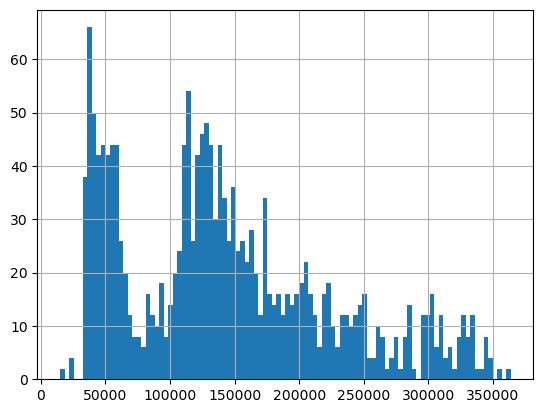

In [174]:
au_cc['rv_seen'].hist(bins=100)

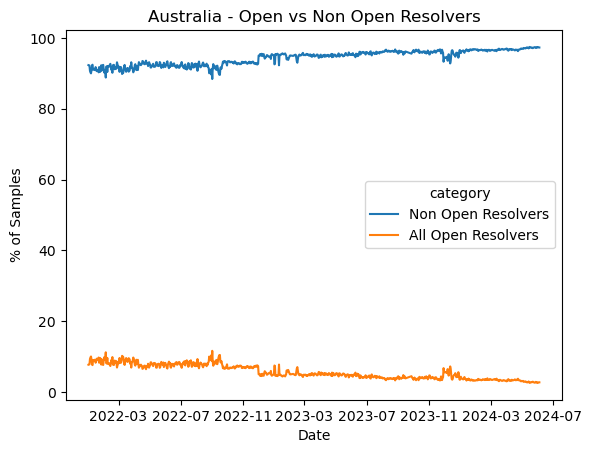

In [189]:
g3 = sns.lineplot(data=au_cc, x='rv_dt', y='value', hue='category')
g3.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
g3.set(title='Australia - Open vs Non Open Resolvers', xlabel='Date', ylabel='% of Samples')
g3.get_figure().savefig('australia-open-resolver-usage.png')

In [ ]:
g4 = cc1['diff_2024_2022'].hist(bins=50)
g4.set(title='Open Resolver Usage Histogram by Country', xlabel='Variation: 2022 to 2024', ylabel='Number of countries')
g4.get_figure().savefig('open-resolver-usage-variation-histogram.png')

## Average of usage on 2024 by country

In [302]:
cc_avg_all_open = (d1
                   .query("rv_dt==2024")
                   .loc[:,
                   ['rv_dt', 'rv_cc', 'rv_seen', 'non_open_res_ration', 'all_open_res_ratio', 'cloudflare', 'quad9',
                    'googlepdns']]
                   .groupby('rv_cc')
                   .agg(**{'Average Open Resolver Usage': ('all_open_res_ratio', 'mean'), 'Average Number of Samples': ('rv_seen', 'mean')})
                    .reset_index()
                   .assign(cc_name=lambda df: df['rv_cc'].map(cc_name_map))
                   )

<Axes: >

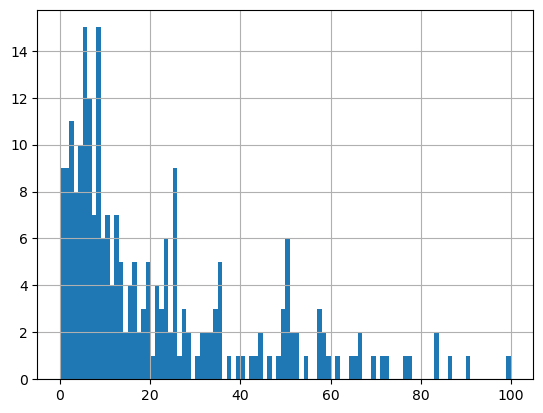

In [303]:
cc_avg_all_open['Average Open Resolver Usage'].hist(bins=100)

In [304]:
cc_avg_all_open

,rv_cc,Average Open Resolver Usage,Average Number of Samples,cc_name
0,AD,59.05,503.0,Andorra
1,AE,13.29,17481.0,United Arab Emirates
2,AF,22.91,7717.0,Afghanistan
3,AG,8.12,431.0,Antigua and Barbuda
4,AI,10.87,138.0,Anguilla
...,...,...,...,...
231,YT,5.24,286.0,Mayotte
232,ZA,11.81,75385.0,South Africa
233,ZM,51.39,13038.0,Zambia
234,ZW,5.79,3782.0,Zimbabwe


In [305]:
with pd.ExcelWriter('open-resolver-usage-by-country.xlsx') as writer:
    cc_avg_all_open.to_excel(writer, sheet_name='All raw data', index=False)
    cc_avg_all_open[cc_avg_all_open['Average Number of Samples']>=10].sort_values(by='Average Open Resolver Usage', ascending=True).head(10).to_excel(writer, index=False, sheet_name='Bottom 10 countries')
    cc_avg_all_open[cc_avg_all_open['Average Number of Samples']>=10].sort_values(by='Average Open Resolver Usage', ascending=False).head(10).to_excel(writer, index=False, sheet_name='Top 10 countries')


In [202]:
d1['rv_dt'].min(), d1['rv_dt'].max()

(Timestamp('2022-01-01 00:00:00'), Timestamp('2024-06-04 00:00:00'))

In [204]:
d1['rv_dt'].dt.year.value_counts()

rv_dt
2022    85949
2023    83586
2024    36857
Name: count, dtype: int64

In [230]:
m49[m49['region_code'].isin(['AQ', 'BL', 'GF', 'FJ', 'YE', 'BN'])]

,region_id,region_parent,region_code,region_name
90,652,029,BL,Saint Barthelemy
113,254,005,GF,French Guiana
153,096,035,BN,Brunei Darussalam
182,887,145,YE,Yemen
249,242,054,FJ,Fiji
274,010,990,AQ,Antartica


## Look into Google PDNS, Cloudflare, Quad9 per year

In [242]:
cc_year_res = (d1
               .assign(year=d1['rv_dt'].dt.year)
               .loc[:, ['rv_dt', 'rv_cc', 'year', 'rv_seen', 'cloudflare', 'quad9', 'googlepdns']]
               .assign(cloudflare_ratio=lambda df: df['cloudflare'] / df['rv_seen'],
                       quad9_ratio=lambda df: df['quad9'] / df['rv_seen'],
                       googlepdns_ratio=lambda df: df['googlepdns'] / df['rv_seen'])
               .groupby(['year', 'rv_cc'])
               .agg(googlepdns_avg=('googlepdns', 'mean'), googlepdns_ratio_avg=('googlepdns_ratio', 'mean'),
                    cloudflare_avg=('cloudflare', 'mean'), cloudflare_ratio_avg=('cloudflare_ratio', 'mean'),
                    quad9_avg=('quad9', 'mean'), quad9_ratio_avg=('quad9_ratio', 'mean'),
                    rv_seen_avg=('rv_seen', 'mean'))
               )

In [243]:
cc_year_res


googlepdns_avg  googlepdns_ratio_avg  cloudflare_avg  \
year rv_cc                                                         
2022 AD         369.637363              0.696299        9.859890   
     AE        7126.000000              0.142528      798.313187   
     AF        4523.269231              0.466377      342.612637   
     AG         359.590659              0.204039       22.931319   
     AI         271.090659              0.354238        2.670330   
...                    ...                   ...             ...   
2024 YT          10.480769              0.035150       12.467949   
     ZA       10144.961538              0.092675     2676.852564   
     ZM        9014.782051              0.484963       80.775641   
     ZW        2227.115385              0.175072       22.384615   
     ZZ          74.096154              0.158566       21.160256   

            cloudflare_ratio_avg    quad9_avg  quad9_ratio_avg    rv_seen_avg  
year rv_cc                                                                     
2022 AD                 0.018995     1.689560         0.003193     522.604396  
     AE                 0.016755    14.750000         0.000310   50296.796703  
     AF                 0.034492     2.890110         0.000327    9860.401099  
     AG                 0.013024     2.785714         0.001587    1760.854396  
     AI                 0.005355     0.456044         0.000792     551.656593  
...                          ...          ...              ...            ...  
2024 YT                 0.040768     0.006410         0.000026     317.320513  
     ZA                 0.026128  1521.557692         0.014078  108627.910256  
     ZM                 0.004456    11.929487         0.000632   18789.153846  
     ZW                 0.002674     4.634615         0.000465   11019.057692  
     ZZ                 0.044509     1.083333         0.002614     435.993590  

[743 rows x 7 columns]

In [266]:
cc_year_res['rv_seen_avg'].quantile([0.05, 0.10, 0.15])

0.05      5.007284
0.10     80.326374
0.15    266.321376
Name: rv_seen_avg, dtype: float64

In [256]:
cc_year_res['googlepdns_avg'].quantile([0.05, 0.10, 0.95])

0.05        1.690170
0.10       10.657968
0.95    32438.371154
Name: googlepdns_avg, dtype: float64

In [286]:
o1 = (cc_year_res
      .query('googlepdns_avg >= 50')
      .groupby(['year'])
      .agg({'googlepdns_ratio_avg': ['idxmin', 'min', 'idxmax', 'max']})
      .stack(level=0)
      .reset_index()
      .assign(cc_min=lambda df: df['idxmin'].apply(lambda x: x[1]),
              cc_max=lambda df: df['idxmax'].apply(lambda x: x[1]),
              dns_service='Google PDNS')
      .drop(columns=['idxmax', 'idxmin', 'level_1'])
      )
o1

,year,min,max,cc_min,cc_max,dns_service
0,2022,0.018367,0.989574,CN,TD,Google PDNS
1,2023,0.011993,0.834058,KW,PM,Google PDNS
2,2024,0.007137,0.875046,KW,BN,Google PDNS


In [276]:
o1['cc_min'].apply(lambda x: x[0])

0    2022
1    2023
2    2024
Name: cc_min, dtype: int32

In [259]:
cc_year_res['cloudflare_avg'].quantile([0.05, 0.10, 0.20, 0.95])

0.05       0.013624
0.10       0.393223
0.20       3.167908
0.95    4514.854762
Name: cloudflare_avg, dtype: float64

In [285]:
# cc_year_res.query('cloudflare_avg >= 1').groupby(['year']).agg({'cloudflare_ratio_avg': ['idxmin', 'min', 'idxmax', 'max']}).reset_index()
o2 = (cc_year_res
      .query('cloudflare_avg >= 1')
      .groupby(['year'])
      .agg({'cloudflare_ratio_avg': ['idxmin', 'min', 'idxmax', 'max']})
      .stack(level=0)
      .reset_index()
      .assign(cc_min=lambda df: df['idxmin'].apply(lambda x: x[1]),
              cc_max=lambda df: df['idxmax'].apply(lambda x: x[1]),
              dns_service='Cloudflare')
      .drop(columns=['idxmax', 'idxmin', 'level_1'])
      )
o2

,year,min,max,cc_min,cc_max,dns_service
0,2022,0.000633,0.594869,HT,GM,Cloudflare
1,2023,0.000287,0.224379,CN,IR,Cloudflare
2,2024,0.000187,0.351165,TJ,IR,Cloudflare


In [261]:
cc_year_res['quad9_avg'].quantile([0.05, 0.10, 0.20, 0.95])

0.05      0.000000
0.10      0.006410
0.20      0.134615
0.95    272.468132
Name: quad9_avg, dtype: float64

In [284]:
# cc_year_res.query('quad9_avg >= 1').groupby(['year']).agg({'quad9_ratio_avg': ['idxmin', 'min', 'idxmax', 'max']}).reset_index()
o3 = (cc_year_res
      .query('quad9_avg >= 1')
      .groupby(['year'])
      .agg({'quad9_ratio_avg': ['idxmin', 'min', 'idxmax', 'max']})
      .stack(level=0)
      .reset_index()
      .assign(cc_min=lambda df: df['idxmin'].apply(lambda x: x[1]),
              cc_max=lambda df: df['idxmax'].apply(lambda x: x[1]),
              dns_service='Quad9')
      .drop(columns=['idxmax', 'idxmin', 'level_1'])
      )
o3

,year,min,max,cc_min,cc_max,dns_service
0,2022,0.000024,0.035871,RS,BZ,Quad9
1,2023,0.000012,0.091386,SA,DJ,Quad9
2,2024,0.000017,0.528003,SA,DJ,Quad9


In [291]:
o4 = (pd
      .concat([o1, o2, o3])
      .rename(columns={'min': 'min_value', 'max': 'max_value'})
      .assign(country_min=lambda df: df['cc_min'].map(cc_name_map),
              country_max=lambda df: df['cc_max'].map(cc_name_map))
      .drop(columns=['cc_min', 'cc_max'])
      .loc[:, ['dns_service', 'year', 'min_value', 'country_min', 'max_value', 'country_max']]
      )
o4


,dns_service,year,min_value,country_min,max_value,country_max
0,Google PDNS,2022,0.018367,China,0.989574,Chad
1,Google PDNS,2023,0.011993,Kuwait,0.834058,Saint Pierre and Miquelon
2,Google PDNS,2024,0.007137,Kuwait,0.875046,Brunei Darussalam
0,Cloudflare,2022,0.000633,Haiti,0.594869,Gambia
1,Cloudflare,2023,0.000287,China,0.224379,Iran (Islamic Republic of)
2,Cloudflare,2024,0.000187,Tajikistan,0.351165,Iran (Islamic Republic of)
0,Quad9,2022,0.000024,Serbia,0.035871,Belize
1,Quad9,2023,0.000012,Saudi Arabia,0.091386,Djibouti
2,Quad9,2024,0.000017,Saudi Arabia,0.528003,Djibouti


In [292]:
o4.to_excel('open-resolvers-min-max-countries-per-year.xlsx', index=False)